In [1]:
#installing libraries
import pandas as pd


In [2]:
trxn = pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response = pd.read_csv('Retail_Data_Response.csv')

In [5]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


# Merge the two datasets into 1 dataframe

In [7]:
df = trxn.merge(response, on="customer_id", how="left")

In [8]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


# Deep dive analysis into raw data

In [10]:
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [11]:
df.shape

(125000, 4)

In [12]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [13]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [14]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


## finding missing values

In [17]:
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [18]:
# find the percentage of missing values
(31/125000)*100

0.024800000000000003

In [19]:
df = df[df['response'].notna()]

In [20]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [21]:
#other method
df = df.dropna()

In [22]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [23]:
# convert data types to necessary data types for logical operations

df['trans_date'] = pd.to_datetime(df['trans_date'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_21136\4266398668.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])


In [24]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response              float64
dtype: object

In [25]:
set(df['response'])

{0.0, 1.0}

In [26]:
df['response'] = df['response'].astype("int64")

In [27]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [28]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


## checking for outliers

In [30]:
import seaborn as sns

<Axes: ylabel='trans_date'>

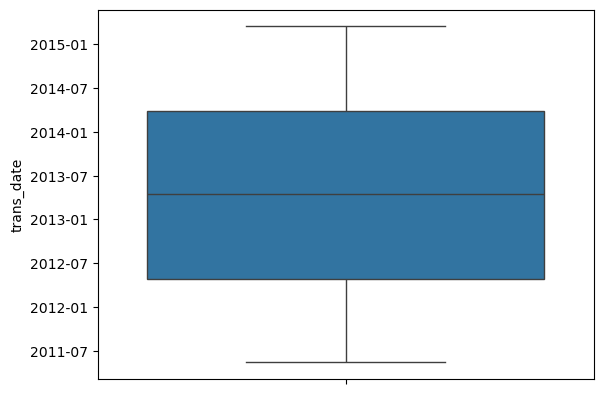

In [31]:
sns.boxplot(df['trans_date'])

<Axes: ylabel='tran_amount'>

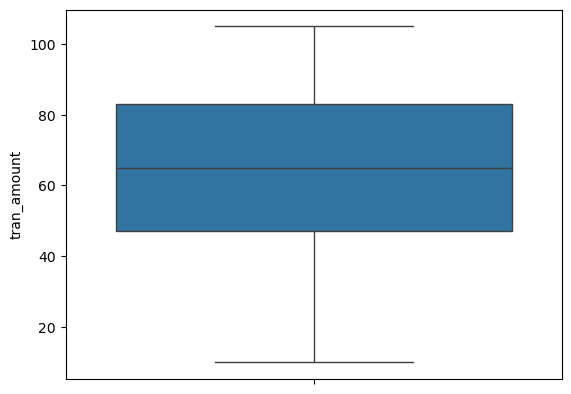

In [32]:
sns.boxplot(df['tran_amount'])

## zscores

In [34]:
import numpy as np
from scipy import stats
z_scores = np.abs((df['tran_amount'] - df['tran_amount'].mean())/df['tran_amount'].std())
z_threshold = 3
outliers = z_scores>z_threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [35]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(df['response']))
z_threshold = 3
outliers = z_scores>z_threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


## create new coloumns

In [37]:
df['month'] = df['trans_date'].dt.month

In [38]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [39]:
# which 3 months have the highest transaction amounts 

monthly_sales = df.groupby("month")["tran_amount"].sum()
monthly_sales

month
1     724089
2     645028
3     636475
4     515746
5     633162
6     697014
7     717011
8     726775
9     694201
10    725058
11    698024
12    709795
Name: tran_amount, dtype: int64

In [40]:
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index()
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795
5,11,698024
6,6,697014
7,9,694201
8,2,645028
9,3,636475


In [41]:
# customers having highest number of orders
customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts


,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [42]:
customer_counts.columns = ['customer_id','count']
customer_counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [43]:
top_customers = customer_counts.sort_values(by="count",ascending=False)
top_customers

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [44]:
top_5_cus = top_customers.head()
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

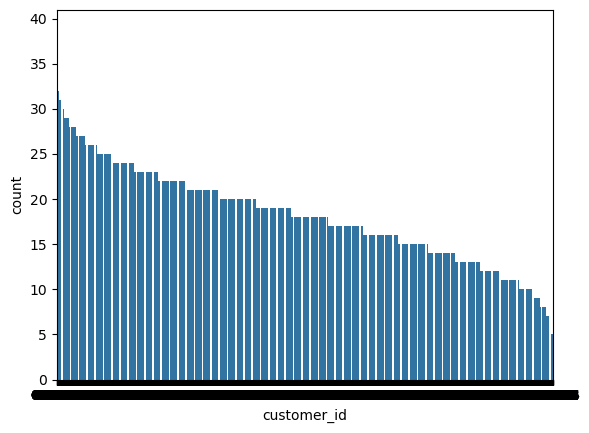

In [45]:
sns.barplot(x="customer_id",y="count",data=top_customers)

<Axes: xlabel='customer_id', ylabel='count'>

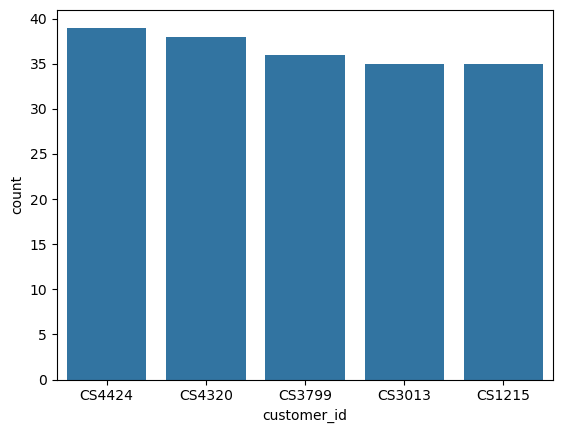

In [46]:
sns.barplot(x="customer_id",y="count",data=top_5_cus)

In [47]:
# Customers with the highest value of oreder 
customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [50]:
top_5_sales = customer_sales.sort_values(by="tran_amount",ascending=False)
top_5_sales = top_5_sales.head()
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

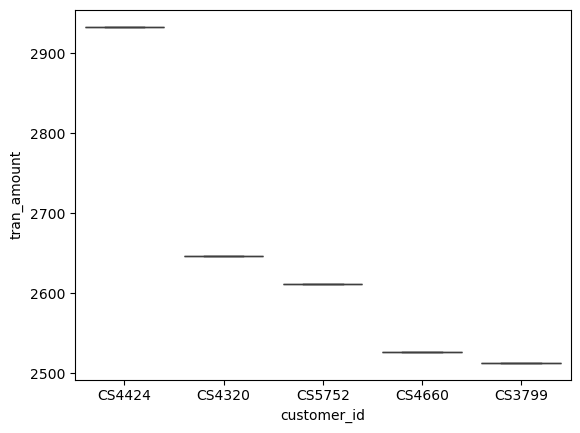

In [52]:
sns.boxplot(x="customer_id",y="tran_amount",data=top_5_sales)

# Advanced Analysis

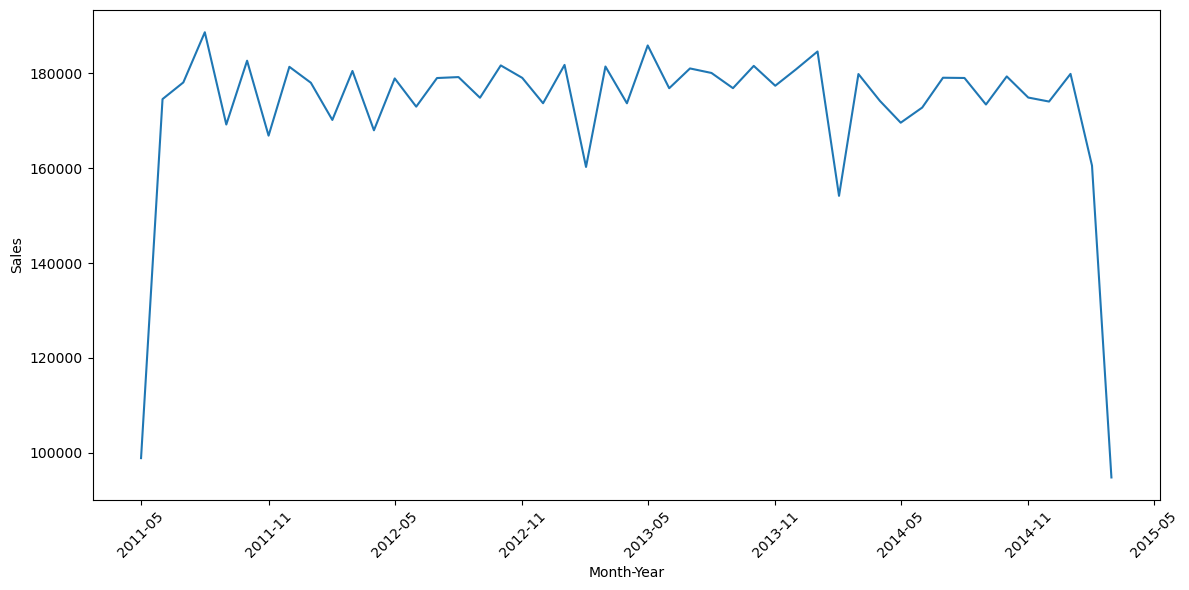

In [54]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Create 'month_year' as Period
df['month_year'] = df['trans_date'].dt.to_period('M')

# Group by month-year and sum sales
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# Convert PeriodIndex to DatetimeIndex for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

# Format x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # locator first
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # then formatter

plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [56]:
monthly_sales.index = monthly_sales.index.to_timestamp()

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

In [58]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


# Cohort Segmentation

In [60]:
# make 3 meterics 
# recency
# freequency
# monetory

recency = df.groupby("customer_id")["trans_date"].max()

freequency = df.groupby("customer_id")["trans_date"].count()

monetory = df.groupby("customer_id")["tran_amount"].sum()

In [62]:
rfm = pd.DataFrame({'recency':recency,'freequency': freequency,'monetory':monetory} )
rfm


,recency,freequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [64]:
def segment_customer(row):
    if row["recency"].year >= 2012 and row["freequency"] >= 15 and row["monetory"] >= 1000:
        return "p0"
    elif (2011 <= row["recency"].year < 2012) and (10 < row["freequency"] < 15) and (500 <= row["monetory"] <= 1000):
        return "p1"
    else:
        return "p2"
rfm["segement"] = rfm.apply(segment_customer, axis=1)

In [66]:
rfm

,recency,freequency,monetory,segement
customer_id,,,,
CS1112,2015-01-14,15,1012,p0
CS1113,2015-02-09,20,1490,p0
CS1114,2015-02-12,19,1432,p0
CS1115,2015-03-05,22,1659,p0
CS1116,2014-08-25,13,857,p2
...,...,...,...,...
CS8996,2014-12-09,13,582,p2
CS8997,2014-06-28,14,543,p2
CS8998,2014-12-22,13,624,p2


# Churn analysis

<Axes: xlabel='response'>

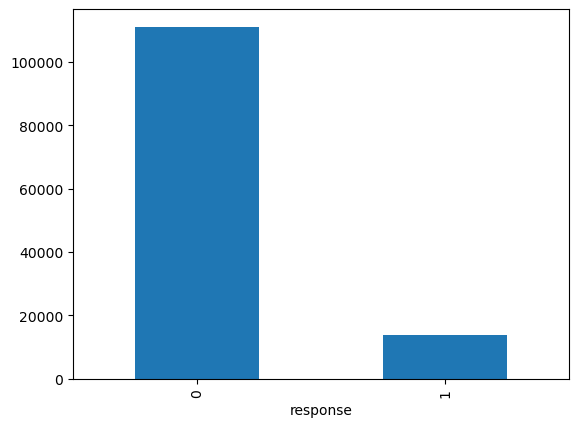

In [68]:
churn_counts = df["response"].value_counts()
# plot
churn_counts.plot(kind="bar")

In [70]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


<Axes: xlabel='month_year'>

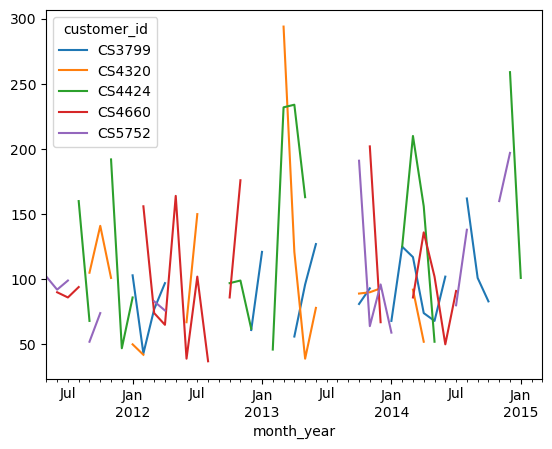

In [72]:
top_5_cus = monetory.sort_values(ascending=False).head(5).index
top_customers_df = df[df['customer_id'].isin(top_5_cus)]
top_customer_sales = top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind="line")

In [74]:
df.to_csv('MainData.csv')

In [76]:
rfm.to_csv('AddAnlys.csv')

# Response Rate Profiling

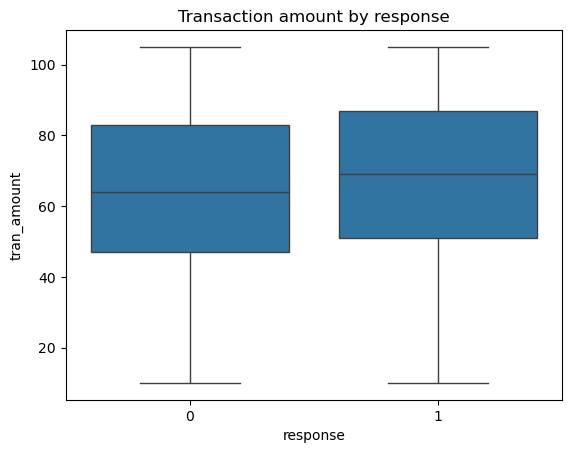

In [80]:
# response in corelation with transaction amount
sns.boxplot(x="response",y="tran_amount",data = df)
plt.title("Transaction amount by response")
plt.show()

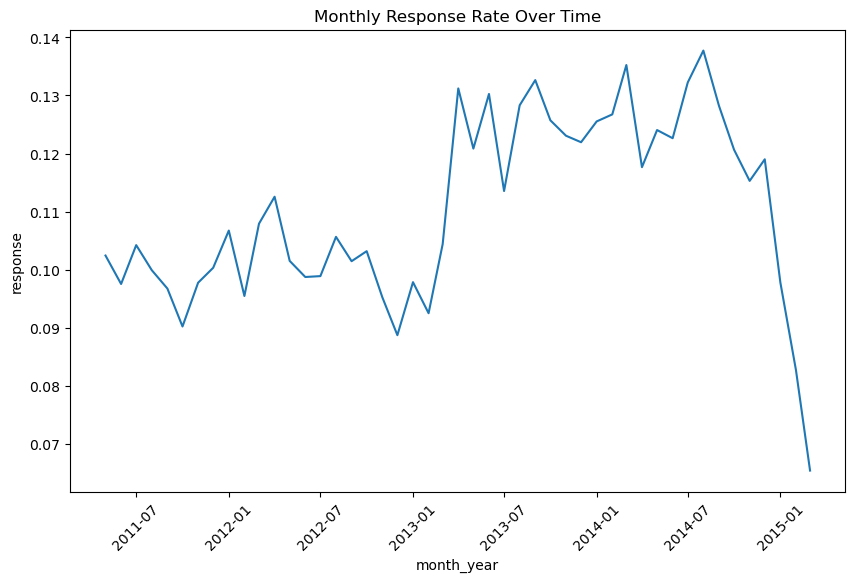

In [95]:
monthly_response = df.groupby('month_year')['response'].mean().reset_index()
monthly_response['month_year'] = monthly_response['month_year'].dt.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(x='month_year', y='response', data=monthly_response)
plt.xticks(rotation=45)
plt.title('Monthly Response Rate Over Time')
plt.show()


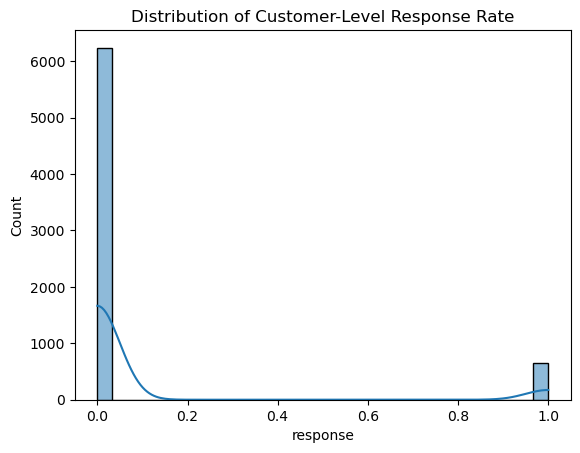

In [103]:
customer_response = df.groupby('customer_id')['response'].mean()
sns.histplot(customer_response, bins=30, kde=True)
plt.title('Distribution of Customer-Level Response Rate')
plt.show()

# Correlation Analysis: 


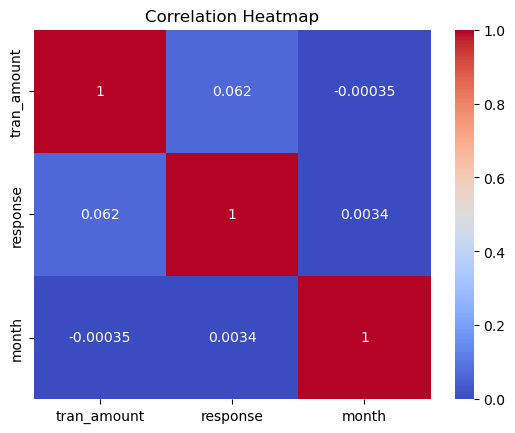

In [106]:
corr = df[['tran_amount', 'response', 'month']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
